# Estatistica
Pode ser **Quantitativa** (discreta \[contagem] ou continua \[medido]), ou **Qualitativa** (nominal \[descritiva] ou ordinal \[ordenavel])

In [7]:
import pandas as pd
import numpy as np
import math
import random
from functools import reduce
from itertools import groupby

## Amostra
**Amostra** é o nome dado a parte dos dados utilizado para analise

Quando todos os dados sao utilizado é dado o nome de **População**
O resultado de uma **amostra** é chamado de *estatistica*, e o resultado de uma **população** é chamado de *parâmetro*

In [8]:
amostra = [random.randint(1, 100) for x in range(0, 100)]
amostra.sort()
print(amostra)
amostra_pd = pd.Series(amostra)
print(amostra_pd)

[1, 2, 3, 3, 5, 6, 6, 6, 7, 9, 10, 10, 11, 12, 13, 13, 14, 14, 14, 15, 16, 16, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 24, 24, 24, 27, 27, 28, 29, 30, 30, 30, 30, 31, 32, 32, 33, 34, 34, 36, 37, 37, 38, 39, 41, 44, 47, 47, 47, 48, 48, 49, 50, 50, 54, 56, 60, 61, 61, 64, 65, 66, 68, 70, 70, 70, 70, 73, 76, 76, 76, 76, 77, 77, 77, 78, 78, 80, 83, 83, 86, 86, 91, 92, 92, 94, 96, 98, 98]
0      1
1      2
2      3
3      3
4      5
      ..
95    92
96    94
97    96
98    98
99    98
Length: 100, dtype: int64


## Média
soma de todos os valores dividido pelo numero de valores

In [9]:
print(reduce(lambda n1,n2: n1+n2, amostra) / len(amostra))
print(amostra_pd.mean())

42.58
42.58


## Mediana
Localiza o valor no meio da amostra, caso a quantidade de amostra seja par, pegar os dois do meio e tirar a media

In [10]:
print((amostra[int((len(amostra)-1)/2)] + amostra[int((len(amostra)+1)/2)])/2 if len(amostra) % 2 == 0 else amostra[math.floor(len(amostra)/2)])
print(amostra_pd.median())

35.0
35.0


## Moda
Valor que aparece mais vezes dentro da amostra

In [11]:
grupo = [(k,len(list(v))) for (k,v) in groupby(amostra)]
maior = reduce(lambda n1,n2: n1 if n1 > n2 else n2, map(lambda x: x[1], grupo))
print([x[0] for x in grupo if x[1] == maior])
amostra_pd.mode()

[30, 70, 76]


0    30
1    70
2    76
dtype: int64

## Quartil
Amostra divida em 4 partes(0%-25%, 25%-50%, 50%-75%, 75%-100%)

In [12]:
quantidade = math.ceil((25/100) * len(amostra))
print((amostra[quantidade-1] + amostra[quantidade])/2)
quantidade = math.ceil((50/100) * len(amostra))
print((amostra[quantidade-1] + amostra[quantidade])/2)
quantidade = math.ceil((75/100) * len(amostra))
print((amostra[quantidade-1] + amostra[quantidade])/2)

print(amostra_pd.quantile(0.25))
print(amostra_pd.quantile(0.50))
print(amostra_pd.quantile(0.75))
amostra_pd.describe()

18.5
35.0
70.0
18.75
35.0
70.0


count    100.000000
mean      42.580000
std       28.304327
min        1.000000
25%       18.750000
50%       35.000000
75%       70.000000
max       98.000000
dtype: float64

## Desvio padrão
variancia é igual ao desvio padrao ao quadrado

a/a² = simbolo de desvio padrao/variancia para populacao
s/s² = simbolo de desvio padrao/variancia para amostra

In [54]:
u = sum(amostra)/len(amostra)
s = (sum([(x-u)**2 for x in amostra])/(len(amostra)-1))**0.5
print(s)
print(amostra_pd.std())

28.30432739873798
28.30432739873798


## Coeficiente de variação
(desvio padrao/media)*100

In [43]:
print((amostra_pd.std()/amostra_pd.mean())*100)

66.47329121356971


## Amplitude
maior numero menos menor numero

In [40]:
print(reduce(lambda n1,n2: n1 if n1 > n2 else n2, amostra) - reduce(lambda n1,n2: n1 if n1 < n2 else n2, amostra))
print(amostra_pd.max() - amostra_pd.min())

97
97


## Escore Z
(numero - desvio padrao)/media mostra quando desvios padroes o numero esta fora da meia

In [62]:
print(u)
print(s)
print(amostra_pd[8])
v = (amostra_pd[8]-amostra_pd.mean())/amostra_pd.std()
print(v)
print(u + (v * s))
print(amostra_pd[78])
v = (amostra_pd[78]-amostra_pd.mean())/amostra_pd.std()
print(v)
print(u + (v * s))

42.58
28.30432739873798
7
-1.2570515984628705
7.0
73
1.0747473194277832
73.0


## boxplot
mostra dos quartis centrais e o outliners

18.5
35.0
70.0
0    18.5
1    35.0
2    70.0
Name: 0, dtype: float64
51.5
-58.75
147.25


<AxesSubplot:>

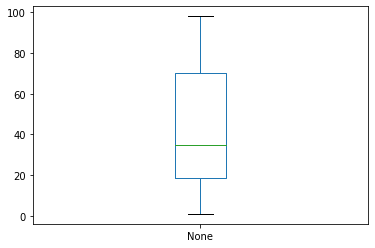

In [111]:
q = (25/len(amostra)) * 100
q1 = (amostra[int(q)-1] + amostra[int(q)])/2 if math.remainder(q,1)==0 else amostra[math.ceil(q)]
print(q1)
q = (50/len(amostra)) * 100
q2 = (amostra[int(q)-1] + amostra[int(q)])/2 if math.remainder(q,1)==0 else amostra[math.ceil(q)]
print(q2)
q = (75/len(amostra)) * 100
q3 = (amostra[int(q)-1] + amostra[int(q)])/2 if math.remainder(q,1)==0 else amostra[math.ceil(q)]
print(q3)
qs = amostra_pd.quantile([0.25,0.5,0.75], interpolation="midpoint").reset_index()[0]
print(qs)
diq = q3 - q1
print(diq)
print(q1 - 1.5*diq)
print(q3 + 1.5*diq)
amostra_pd.plot.box()